# IML Assignment 1

## Name: Sofia Gamershmidt

## Mail: s.gamershmidt@innopolis.university

## Group: B22-DS-02


### Code style policy 

We expect you to follow https://peps.python.org/pep-0008/ Python standart style and will reduce your points if you don't. Also we ask you to comment your code when it's needed (logical blocks, function declaration, loops), however over-documentation is the evil.

Example of nice code style (no need to run this cells):

In [144]:
# This function returns the sum of parameters
# @param my_param1 - here I explain what this parameter means
# @param my_param2 - here I explain what this parameter means
# @return - result of func if it's not void
def my_func(my_param1: int, my_param2: int):
    return my_param1 + my_param2

There are few lines only, but they are represents important logical blocks, thus you should explain what their purpose:

In [145]:
# from my_training_package import my_regression, my_loader

# # Data loading
# x, y = my_loader.load("some.csv")

# # Training
# reg = my_regression()
# reg.train(x, y)

# # Evaluation on the same data set
# y_pred = reg.evaluation(y)

Example of too detailed and meaningless commenting that is not welcome:

In [146]:
# Import numpy package
import numpy as np

# This is variable x
x = 5
# This is variable y
y = 10
# Print x
print(x)

5


Ultimately, we belive in your programming common sense :) The purpose of clear code style is fast and smooth grading of your implementation and checking that you understand ML concepts.

## Task 1

### 3.1. Linear Regression
#### Data reading

In [147]:
import pandas as pd

df = pd.read_csv("/home/sofia/Документы/Assignment 1/train_1.csv")

# Extract features (X) and target variable (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

#### Train\validation splitting

In [148]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


#### Linear regression model fitting

In [149]:
from sklearn.linear_model import LinearRegression

# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [150]:
from sklearn import metrics


# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    print("Mean Squared Error: ", metrics.mean_squared_error(y_actual, y_pred))
    print("Root Mean Squared Error: ", metrics.root_mean_squared_error(y_actual, y_pred))
    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_actual, y_pred))
    print("R2 score: ", metrics.r2_score(y_actual, y_pred))


print_metrics(y_test, y_pred_lr)

Mean Squared Error:  4719.207979563596
Root Mean Squared Error:  68.69649175586477
Mean Absolute Error:  58.94813663212619
R2 score:  0.8601907274847328


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [151]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [152]:
# Declare a Pipeline instance
pipeline = Pipeline(steps=[
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('linearregression', LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [153]:
from sklearn.model_selection import GridSearchCV

# Declare a GridSearch instance 
param_grid = {'polynomialfeatures__degree': range(2, 6)}

search = GridSearchCV(pipeline, param_grid=param_grid, cv=8, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

# Predict using the best model from the grid search
x = search.predict(X_test)

# Find the optimum degrees
print(f"Best parameter (CV score={search.best_score_}):")
print(search.best_params_)

Best parameter (CV score=-0.41157741338279086):
{'polynomialfeatures__degree': 4}


In [154]:
print_metrics(y_test, x)

Mean Squared Error:  0.21457368559783035
Root Mean Squared Error:  0.4632209900229375
Mean Absolute Error:  0.34938523451989134
R2 score:  0.9999936431301578


#### Save the model

In [155]:
import pickle

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

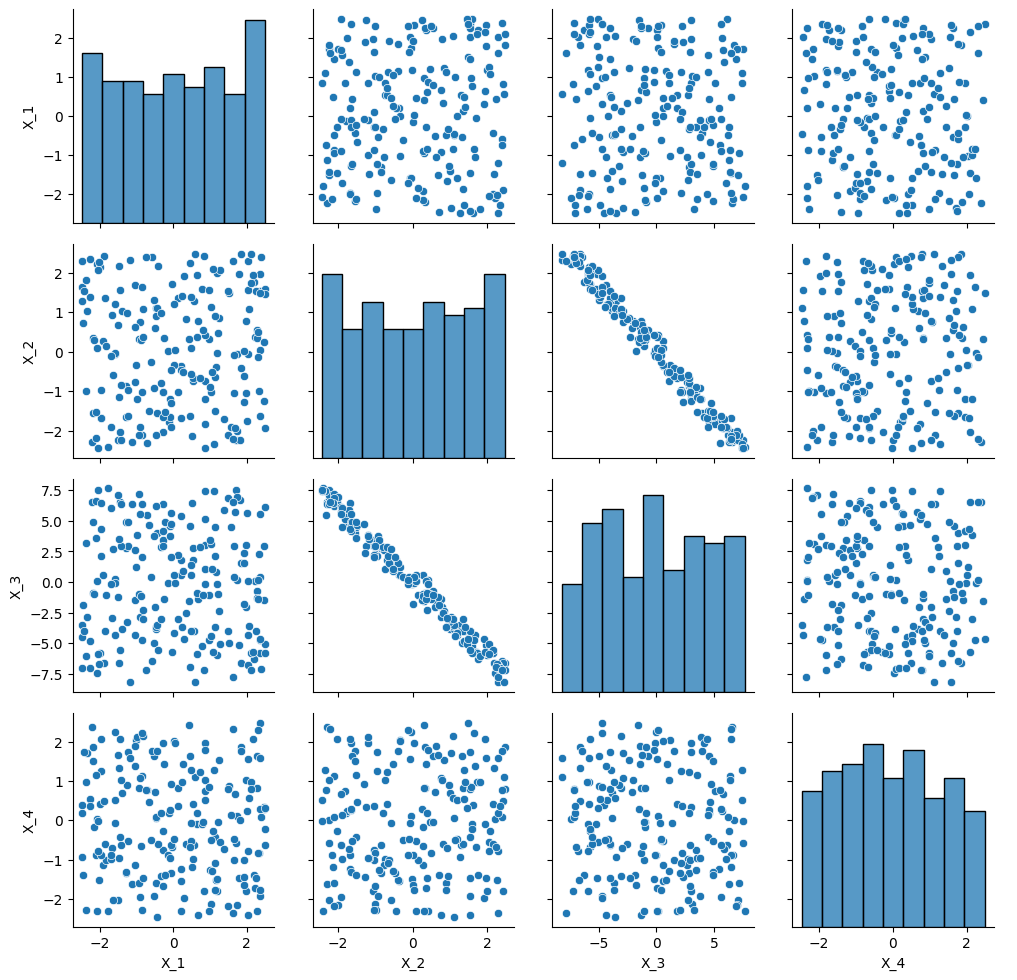

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract features for correlation matrix
corr = df.drop([df.columns[0], df.columns[-1]], axis=1)

g = sns.PairGrid(corr)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

As we can notice, X_2 and X_3 parameters have strong correlation (since the shape of points tends to the linear shape)

## Task 2

### Data processing
#### Loading the dataset

In [157]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [158]:
df = pd.read_csv("/home/sofia/Документы/Assignment 1/pokemon_modified.csv")
df = df.drop(['name', 'classification'], axis=1)

# Display information about the DataFrame
df.info()

# Display the number of unique values in each column
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          33
defense              109
experience_growth      6
height_m              51
hp                    99
percentage_male        7
type1                 17
sp_attack            111
sp_defense            97
speed                113
weight_kg            421
generation             7
is_legendary           2
dtype: int64

After exploration information about dataset, the two features with categorical data of many unique items were removed

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [193]:
from sklearn.model_selection import train_test_split

X = df.drop(["is_legendary"], axis=1)
y = df['is_legendary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,           # Features
    y,           # Target variable
    train_size=0.8,       # Percentage of data for training
    random_state=123,     # Seed for reproducibility
    test_size=0.2,        # Percentage of data for testing
    stratify=y            # Maintain class distribution in the splits
)

Check if the dataset is balanced or not and comment on it

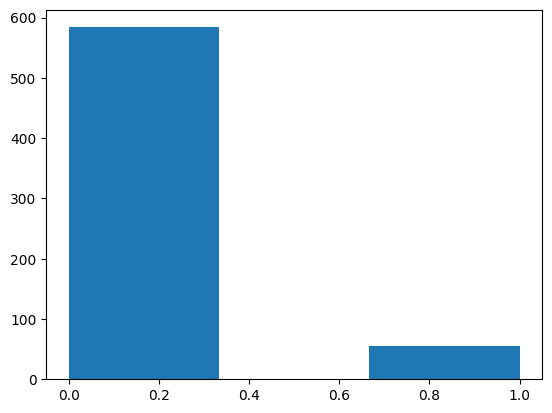

In [194]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=3, label=['0', '1'])
plt.show()

The dataset is imbalanced since classes sizes differs significantly. However, since the original dataset preserves approximately the same classes distribution, there are no problem.

#### Checking for missing values

In [196]:
nan_count = pd.isna(X_train).sum()
print("Number of NaN values in X_train:\n", nan_count)
nan_count = pd.isna(X_test).sum()
print("Number of NaN values in X_test:\n", nan_count)

Number of NaN values in X_train:
 against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             16
hp                    0
percentage_male      83
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            16
generation            0
dtype: int64
Number of NaN values in X_test:
 against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_

Features height_m, percentage_male and weight_kg contain nan values

#### Impute the missing values

In [197]:
from sklearn.impute import SimpleImputer
import numpy as np

# Define a SimpleImputer instance
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the model and fill the missing values in train and test datasets
imputer.fit(X_train)

X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values

In [198]:
nan_count = pd.isna(X_train).sum()
print("Number of NaN values in X_train:\n", nan_count)
nan_count = pd.isna(X_test).sum()
print("Number of NaN values in X_test:\n", nan_count)

Number of NaN values in X_train:
 against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64
Number of NaN values in X_test:
 against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0


There are no missed values in the datasets

#### Encode categorically

In [199]:
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# Fit model on column with categorical data and encode train array
X_encoded = encoder.fit_transform(X_train[['type1']])
df_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['type1']))
X_train1 = pd.DataFrame.join(X_train, df_encoded)
X_train1 = X_train1.drop(columns=['type1'])
# Fit model on column with categorical data and encode test array
X_encoded = encoder.transform(X_test[['type1']])
df_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['type1']))
X_test1 = pd.DataFrame.join(X_test, df_encoded)
X_test1 = X_test1.drop(columns=['type1'])

#### Scale the data

In [200]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Define a scaler instance from one of the above
scaler = MinMaxScaler()
scaler.fit(X_train1)

# Apply the scaler on both train and test features
x_train = pd.DataFrame(scaler.transform(X_train1), columns=X_train1.columns)
x_test = pd.DataFrame(scaler.transform(X_test1), columns=X_test1.columns)


#### Confusion Matrix

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

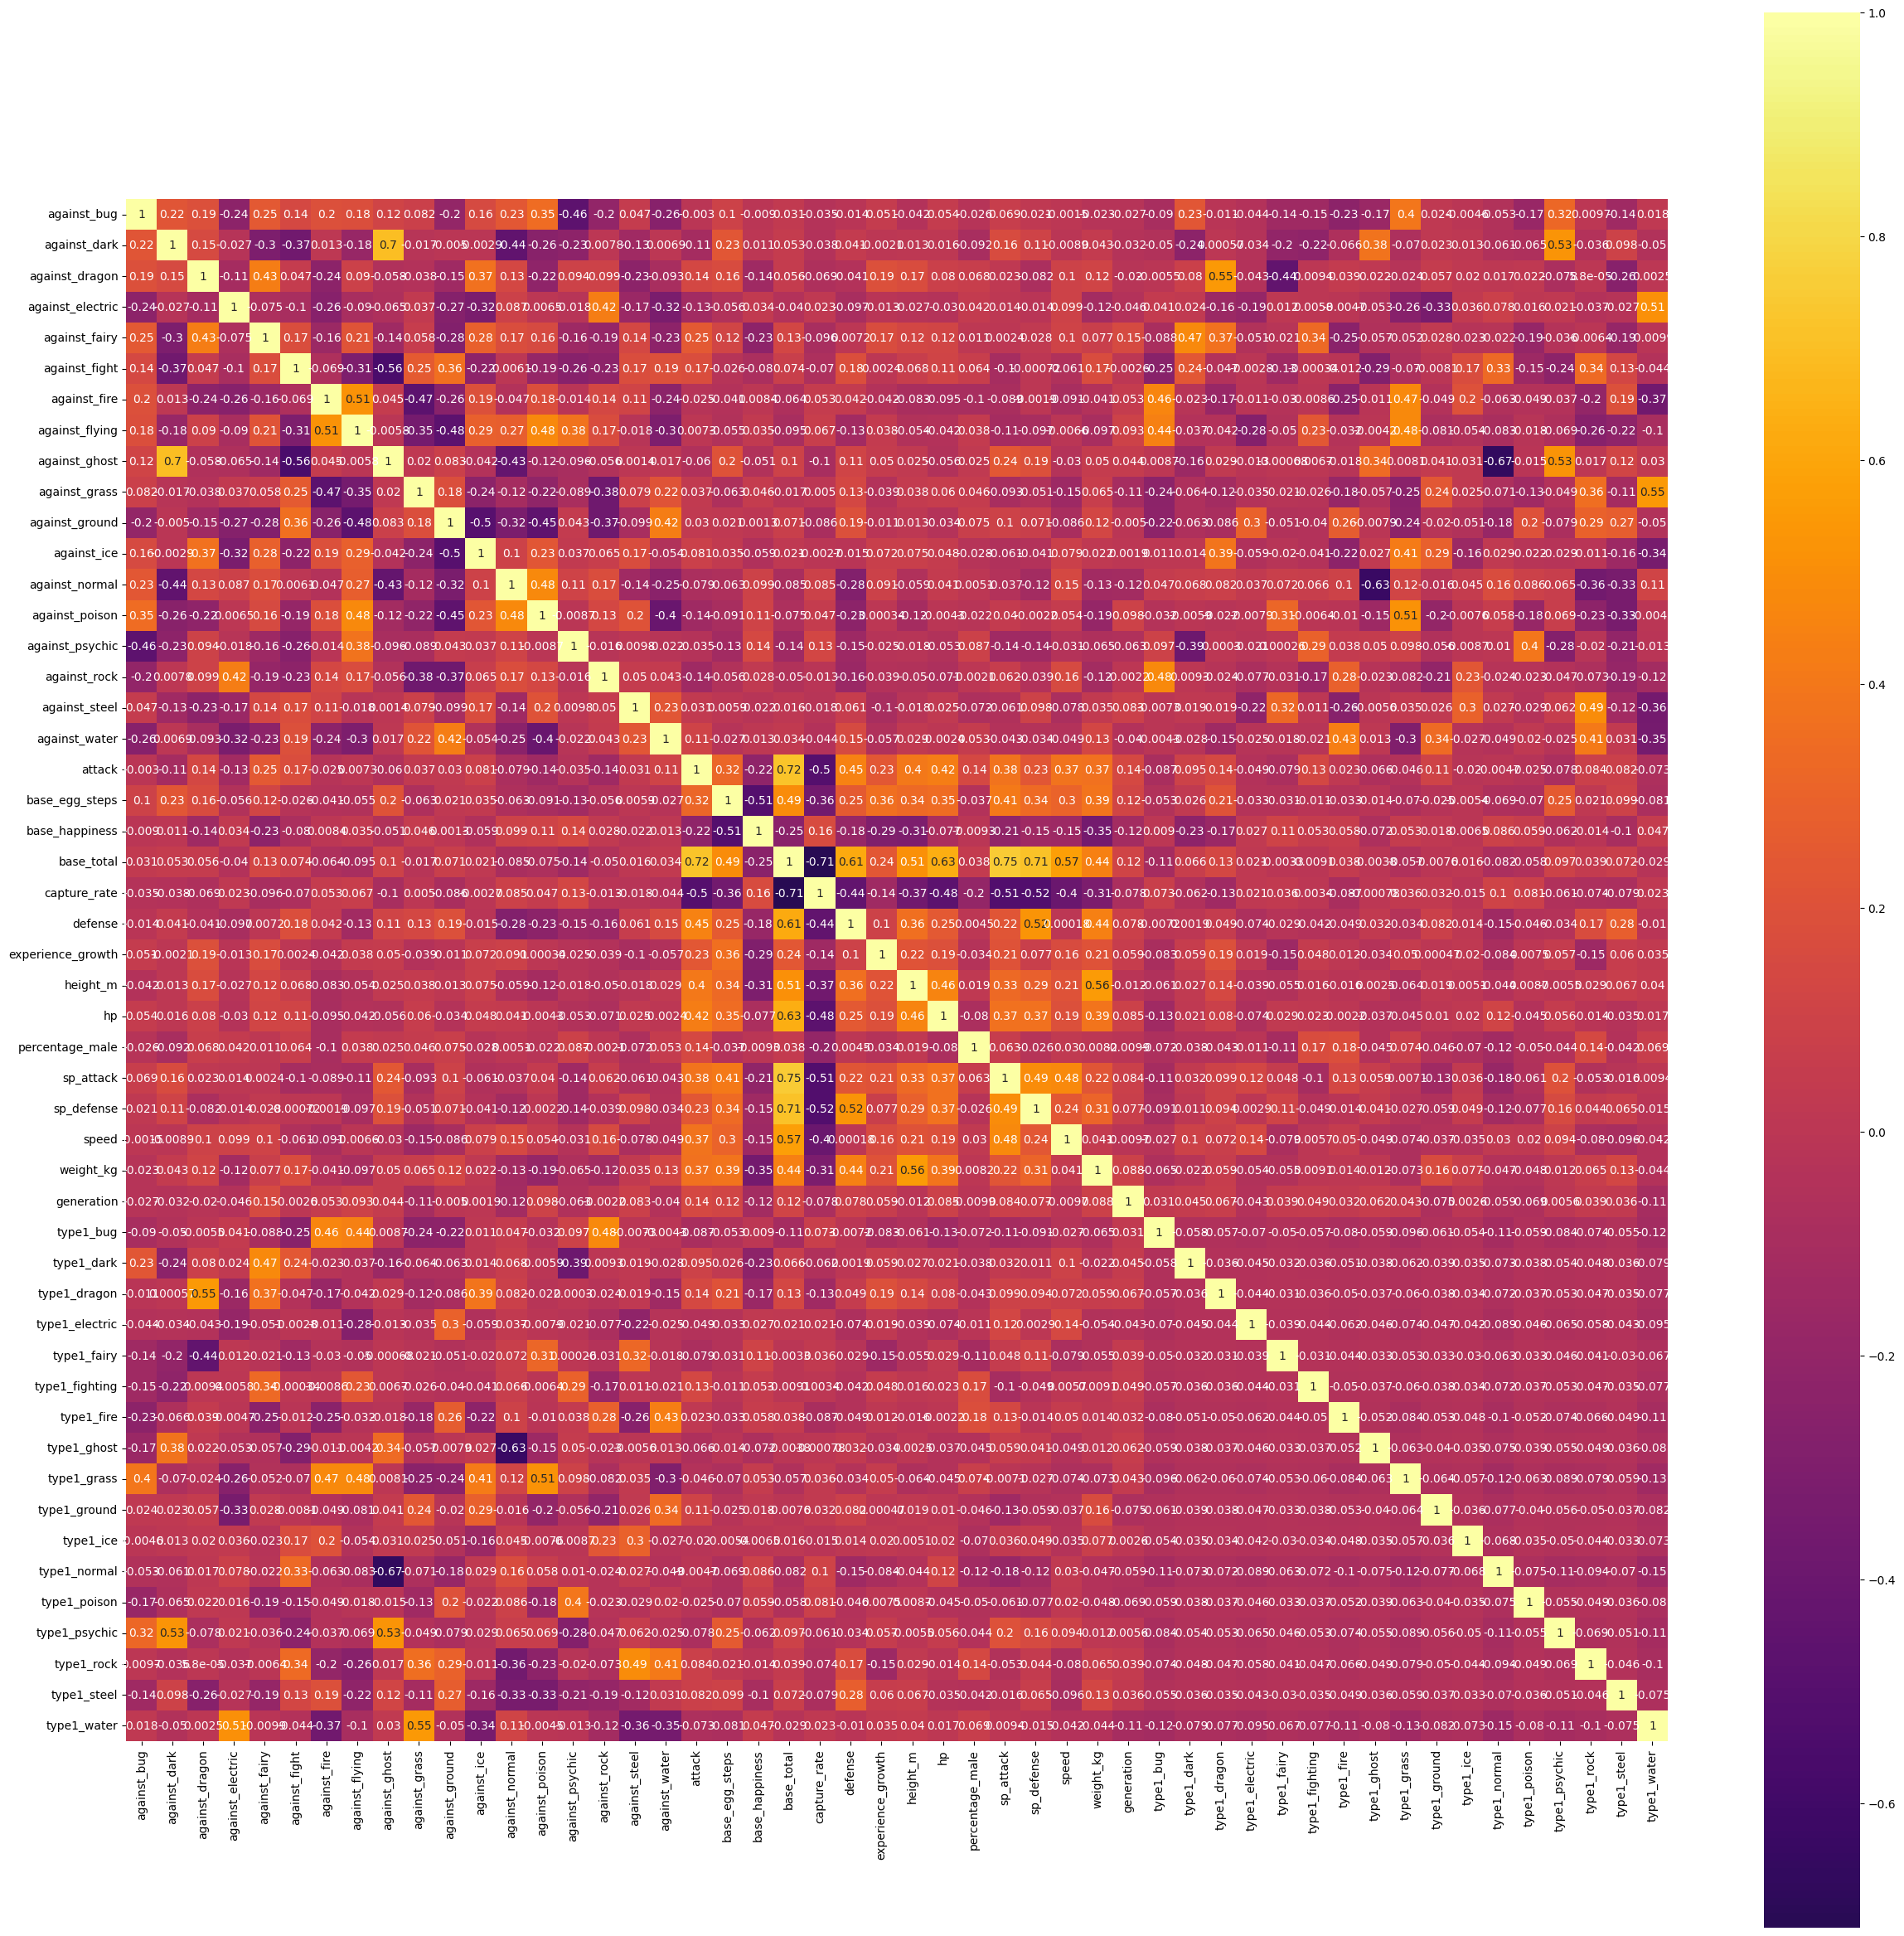

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the correlation matrix
plt.figure(figsize=(30, 30))
corr_matrix = x_train.corr()
sns.heatmap(corr_matrix, cmap="inferno", center=0, square=True, annot=True)
plt.show()

As we can notice, the maximal absolute values of correlation do not exceed 0.75(no highly correlated features), which is not enough to be a problem. Therefore, there are no need to get rid of some features.

### Model fitting and Comparison

#### Tuning LR model

In [202]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score 
def print_clf_metrics(y_actual, y_pred):
    print("Accuracy: ", metrics.accuracy_score(y_actual, y_pred))
    print("Precision: ", metrics.precision_score(y_actual, y_pred))
    print("Recall: ", metrics.recall_score(y_actual, y_pred))
    print("F1 score: ", metrics.f1_score(y_actual, y_pred))

In [203]:
# Specify parameters for GridSearchCV as in intruction

parameters = {
    'penalty': ['l2', 'l1'],
    'C': list(np.logspace(-3, 3, 7)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression inside GridSearchCV with the parameters above
lr_clf_gs = GridSearchCV(LogisticRegression(max_iter=1000), parameters, scoring='f1')
lr_clf_gs.fit(x_train, y_train)

/home/sofia/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sofia/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sofia/.local/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/sofia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, sel

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'penalty': ['l2', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [204]:
print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Accuracy :", lr_clf_gs.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9339047619047619


#### Construct a LR with the best params and Evaluate the LR with the best params

In [205]:
lr_clf = lr_clf_gs.best_estimator_
lr_y_pred = lr_clf.predict(x_test)

In [206]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy:  0.9937888198757764
Precision:  0.9333333333333333
Recall:  1.0
F1 score:  0.9655172413793104


#### Print the regression coefficients and find the names of the top 5 most influencing features and the top 5 ignored features

In [207]:
#Create dataframe of absolute values of coefficients
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': abs(lr_clf.coef_[0])})

# Select influencing and ignored features based on norm of coefficient
top_features = coefficients.nlargest(5, 'Coefficient')
print("Top 5 Most Influencing Features:")
print(top_features)

ignored_features = coefficients.nsmallest(5, 'Coefficient')
print("\nTop 5 Ignored Features:")
print(ignored_features)

Top 5 Most Influencing Features:
              Feature  Coefficient
19     base_egg_steps    13.509166
22       capture_rate    10.604075
44       type1_normal     9.620534
21         base_total     7.445425
24  experience_growth     6.948595

Top 5 Ignored Features:
            Feature  Coefficient
0       against_bug          0.0
1      against_dark          0.0
3  against_electric          0.0
4     against_fairy          0.0
6      against_fire          0.0


#### Tuning KNN model

In [208]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 5)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

# Declare gridsearch and fit it
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='f1')
knn_clf_gs.fit(x_train, y_train)

print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :", knn_clf_gs.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.6123202614379085


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [209]:
knn_clf = knn_clf_gs.best_estimator_
knn_y_pred = knn_clf.predict(x_test)
print_clf_metrics(y_test, knn_y_pred)

Accuracy:  0.9751552795031055
Precision:  1.0
Recall:  0.7142857142857143
F1 score:  0.8333333333333334


#### Fitting GNB to the data and evaluating on the test dataset

In [210]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 
gauss_nb_clf = GaussianNB().fit(x_train, y_train)
gauss_y_pred = gauss_nb_clf.predict(x_test)

print_clf_metrics(y_test, gauss_y_pred)

Accuracy:  0.9316770186335404
Precision:  0.56
Recall:  1.0
F1 score:  0.717948717948718


#### Which metric is most appropriate for this task and why?

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [225]:
#Based on the provided metrics, Logistic Regression performs the best overall, having the highest accuracy, precision, recall, and F1 score.

## 5. Bonus Task

#### Loading the Dataset

In [214]:
import pandas as pd

train_data = pd.read_csv('/home/sofia/Документы/Assignment 1/bonus_train.csv')

test_data = pd.read_csv('/home/sofia/Документы/Assignment 1/bonus_test.csv')
test_data.head()

,var1,var2,var3,target
0,26.052523,4.698298,239.765969,1
1,62.205061,4.373559,207.581273,1
2,11.390621,4.494386,244.578095,0
3,35.320556,2.731171,322.284266,2
4,53.508643,3.575985,247.902236,1


In [216]:
# Split the data
X_train, X_test, y_train, y_test = train_data.drop(['target'], axis=1), test_data.drop(['target'], axis=1), train_data[
    'target'], test_data['target']
print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

/home/sofia/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sofia/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sofia/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


[]

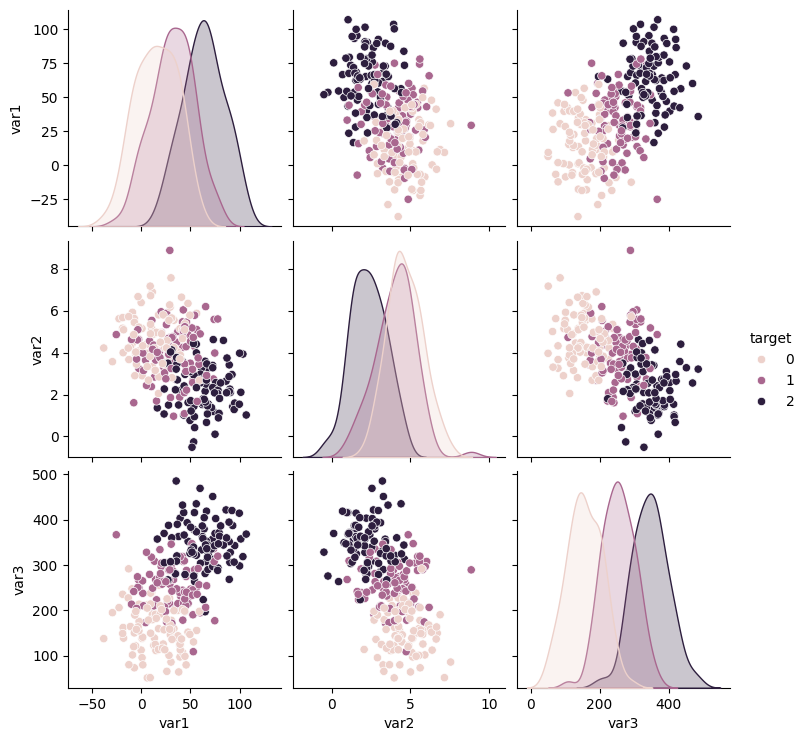

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data, hue="target", kind='scatter')
plt.plot()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [218]:
ovr_lr = LogisticRegression(multi_class='ovr').fit(X_train, y_train)
y_pred_ovr = ovr_lr.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_ovr))

Accuracy:  0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [219]:
multi_lr = LogisticRegression(max_iter=1000, multi_class='multinomial').fit(X_train, y_train)
y_pred_multi = multi_lr.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_multi))

Accuracy:  0.9


#### Using gridsearch to tune the C value and multi class

In [220]:
params = {
    'C': list(np.logspace(-10, 10, 7)),
    'multi_class': ['multinomial', 'ovr']
}
grid_search_clf = GridSearchCV(LogisticRegression(max_iter=1000), params)
grid_search_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-10, 2.1544346900318867e-07,
                               0.0004641588833612782, 1.0, 2154.4346900318865,
                               4641588.833612791, 10000000000.0],
                         'multi_class': ['multinomial', 'ovr']})

In [221]:
print("Tuned Hyperparameters : ", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters :  {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


#### Comment on why one multi_class technique was better than the other

In cases where the decision boundaries between classes overlap, a multi-class approach might better capture the intricate relationships between features and classes. OvR, by treating each class independently, may struggle to handle overlapping decision regions, leading to lower accuracy.

#### Create LR with the best params

In [222]:
multi_lr = grid_search_clf.best_estimator_

#### Visualize the decision boundaries

/home/sofia/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


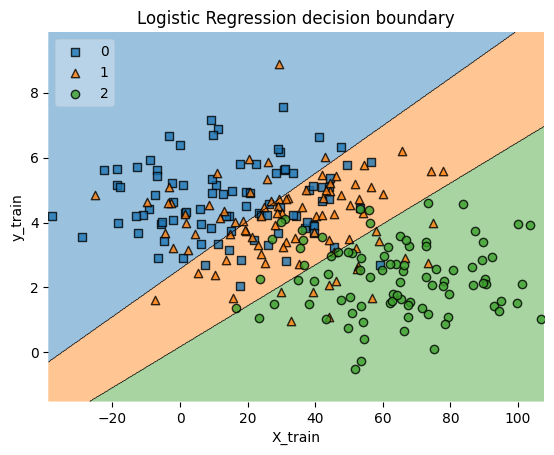

In [186]:
from mlxtend.plotting import plot_decision_regions

# Select var1 and var2 features for training model and plottiing decision regions
X_reduced = X_train.drop(['var3'], axis=1)
multi_lr.fit(X_reduced, y_train)
plot_decision_regions(X_reduced.to_numpy(), y_train.to_numpy(), clf=multi_lr, legend=2)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?